# **Playground Series - Season 5, Episode 12**
> Diabetes Prediction Challenge
---

## 1. Business Understanding

- Source Link :https://www.kaggle.com/competitions/playground-series-s5e12
- Goal : Predict the probability that a patient will be diagnosed with diabetes.

### - Evaluation
Submissions are evaluated on Area Under the ROC Curve (AUC) between the predicted probability and the observed target.

## 2. Data Collection

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualiation
import matplotlib.pyplot as plt
import seaborn as sns

# Import roc_auc_score as metric evaluation
from sklearn.metrics import roc_auc_score

# import libraries to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### - Import dataset

In [2]:
# import the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# additional dataset
additional_dataset = pd.read_csv("diabetes_dataset.csv")

### - Read dataset

In [3]:
# view the train dataset
train.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [4]:
# view the test dataset
test.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,...,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,...,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,...,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,...,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,...,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0


In [5]:
# view the sample_submission dataset
sample_submission.head()

,id,diagnosed_diabetes
0,700000,0
1,700001,0
2,700002,0
3,700003,0
4,700004,0


As we can see that the dependent variable that we should predict (y) is **diagnosed_diabetes**

In [6]:
# view the sample_submission dataset
additional_dataset.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


### - Data deep dive

#### train dataset

In [7]:
# check the data features, data type, null, null%, unique and unique sample each feature on train dataset
list_item = []
for col in train.columns :
    list_item.append([col, train[col].dtype, train[col].isna().sum(), round((train[col].isna().sum()/len(train[col])) * 100,2),
                    train[col].nunique(), list(train[col].drop_duplicates().sample(2).values)]);

train_desc = pd.DataFrame(columns=['data features', 'data type', 'null', 'null%', 'unique', 'unique sample'],
                     data=list_item)
train_desc

,data features,data type,null,null%,unique,unique sample
0,id,int64,0,0.0,700000,"[84173, 158039]"
1,age,int64,0,0.0,71,"[49, 36]"
2,alcohol_consumption_per_week,int64,0,0.0,9,"[4, 9]"
3,physical_activity_minutes_per_week,int64,0,0.0,565,"[528, 126]"
4,diet_score,float64,0,0.0,99,"[5.0, 6.8]"
5,sleep_hours_per_day,float64,0,0.0,69,"[6.2, 6.7]"
6,screen_time_hours_per_day,float64,0,0.0,151,"[4.6, 11.9]"
7,bmi,float64,0,0.0,231,"[22.2, 31.6]"
8,waist_to_hip_ratio,float64,0,0.0,36,"[1.05, 0.87]"
9,systolic_bp,int64,0,0.0,71,"[124, 158]"


In [8]:
# check for duplicated rows
print("Number of duplicated rows: ", sum(train.duplicated()))

Number of duplicated rows:  0


The table showed that the _train_ dataset has **25 columns** with **700000 rows** and **no duplicate value** in it.

#### additional dataset

In [9]:
# check the data features, data type, null, null%, unique and unique sample each feature on add dataset
list_item = []
for col in additional_dataset.columns :
    list_item.append([col, additional_dataset[col].dtype, additional_dataset[col].isna().sum(), round((additional_dataset[col].isna().sum()/len(additional_dataset[col])) * 100,2),
                    additional_dataset[col].nunique(), list(additional_dataset[col].drop_duplicates().sample(2).values)]);

add_desc = pd.DataFrame(columns=['data features', 'data type', 'null', 'null%', 'unique', 'unique sample'],
                     data=list_item)
add_desc

,data features,data type,null,null%,unique,unique sample
0,age,int64,0,0.0,73,"[50, 24]"
1,gender,object,0,0.0,3,"[Female, Other]"
2,ethnicity,object,0,0.0,5,"[Other, White]"
3,education_level,object,0,0.0,4,"[Postgraduate, No formal]"
4,income_level,object,0,0.0,5,"[Low, High]"
5,employment_status,object,0,0.0,4,"[Student, Employed]"
6,smoking_status,object,0,0.0,3,"[Former, Never]"
7,alcohol_consumption_per_week,int64,0,0.0,11,"[2, 0]"
8,physical_activity_minutes_per_week,int64,0,0.0,620,"[185, 541]"
9,diet_score,float64,0,0.0,101,"[10.0, 7.4]"


In [10]:
print(additional_dataset.shape)

(100000, 31)


_additional_dataset_ contains 100000 rows and all the columns as the _train_ dataset. Even though the strucutre is not match, we still can safely append the column to perform a more complete **Exploratory Data Analysis (EDA)**

## 3. Data Preparation

### - Drop column

First, we should drop column _id_ on _train_ dataset because this column is unnecassary to model training. 

In [11]:
# drop column id
train.drop(['id'],axis=1, inplace=True)
test.drop(['id'],axis=1, inplace=True)

### - Combine dataset

In this step, we combine the _train_ dataset with the _additional_dataset_ to enrich our training data. The combined dataset follows the original _train_ dataset, as the model will be trained using this dataset and evaluated against the _test_ dataset.

In [12]:
# fits column additional_dataset with train dataset
additional_dataset = additional_dataset[train.columns]

# append rows from additional_dataset to train
train = pd.concat([train, additional_dataset], ignore_index=True)

# check new train dataset shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 800000 non-null  int64  
 1   alcohol_consumption_per_week        800000 non-null  int64  
 2   physical_activity_minutes_per_week  800000 non-null  int64  
 3   diet_score                          800000 non-null  float64
 4   sleep_hours_per_day                 800000 non-null  float64
 5   screen_time_hours_per_day           800000 non-null  float64
 6   bmi                                 800000 non-null  float64
 7   waist_to_hip_ratio                  800000 non-null  float64
 8   systolic_bp                         800000 non-null  int64  
 9   diastolic_bp                        800000 non-null  int64  
 10  heart_rate                          800000 non-null  int64  
 11  cholesterol_total         

As we can see, the _train_ dataset nos includes all rows from _additional dataset_, indicating that the merge/concatenation process was successful and the training data has been expanded accordingly.

## 4. Exploratory Data Analysis

### - Summary statistics

In [13]:
# see the summarize statistics of train dataset
train.describe()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.00000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,50.329819,2.063819,85.065907,5.967581,7.001652,6.010700,25.84193,0.858430,116.232370,75.414870,70.100889,186.713715,53.850661,102.917676,122.879450,0.158153,0.190591,0.036434,0.620381
std,12.219398,1.101426,57.858291,1.506739,0.928187,2.083645,2.96247,0.039207,11.471964,7.013251,7.135828,19.316077,8.542618,21.353785,27.766268,0.364884,0.392768,0.187367,0.485292
min,18.000000,0.000000,0.000000,0.000000,3.000000,0.500000,15.00000,0.670000,90.000000,50.000000,40.000000,100.000000,20.000000,50.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.80000,0.830000,108.000000,71.000000,65.000000,174.000000,48.000000,88.000000,105.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,2.000000,73.000000,6.000000,7.000000,6.000000,25.80000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,59.000000,3.000000,101.000000,7.000000,7.600000,7.400000,27.80000,0.880000,124.000000,80.000000,75.000000,200.000000,60.000000,117.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,10.000000,833.000000,10.000000,10.000000,16.800000,39.20000,1.060000,179.000000,110.000000,105.000000,318.000000,98.000000,263.000000,344.000000,1.000000,1.000000,1.000000,1.000000


Based ont summary statistics, the data distribution appears to be reasonably well-balanced. This can be observed from the mean (50%), as well as the interquartile range (IQR) represented by the 25% and 75% percentiles, which show no extreme skewness.

To further validate the distribution patterns on _train_ dataset and identify potential anomalies, we visualize the data using histogram to better understand the distribution of each numerical feature.

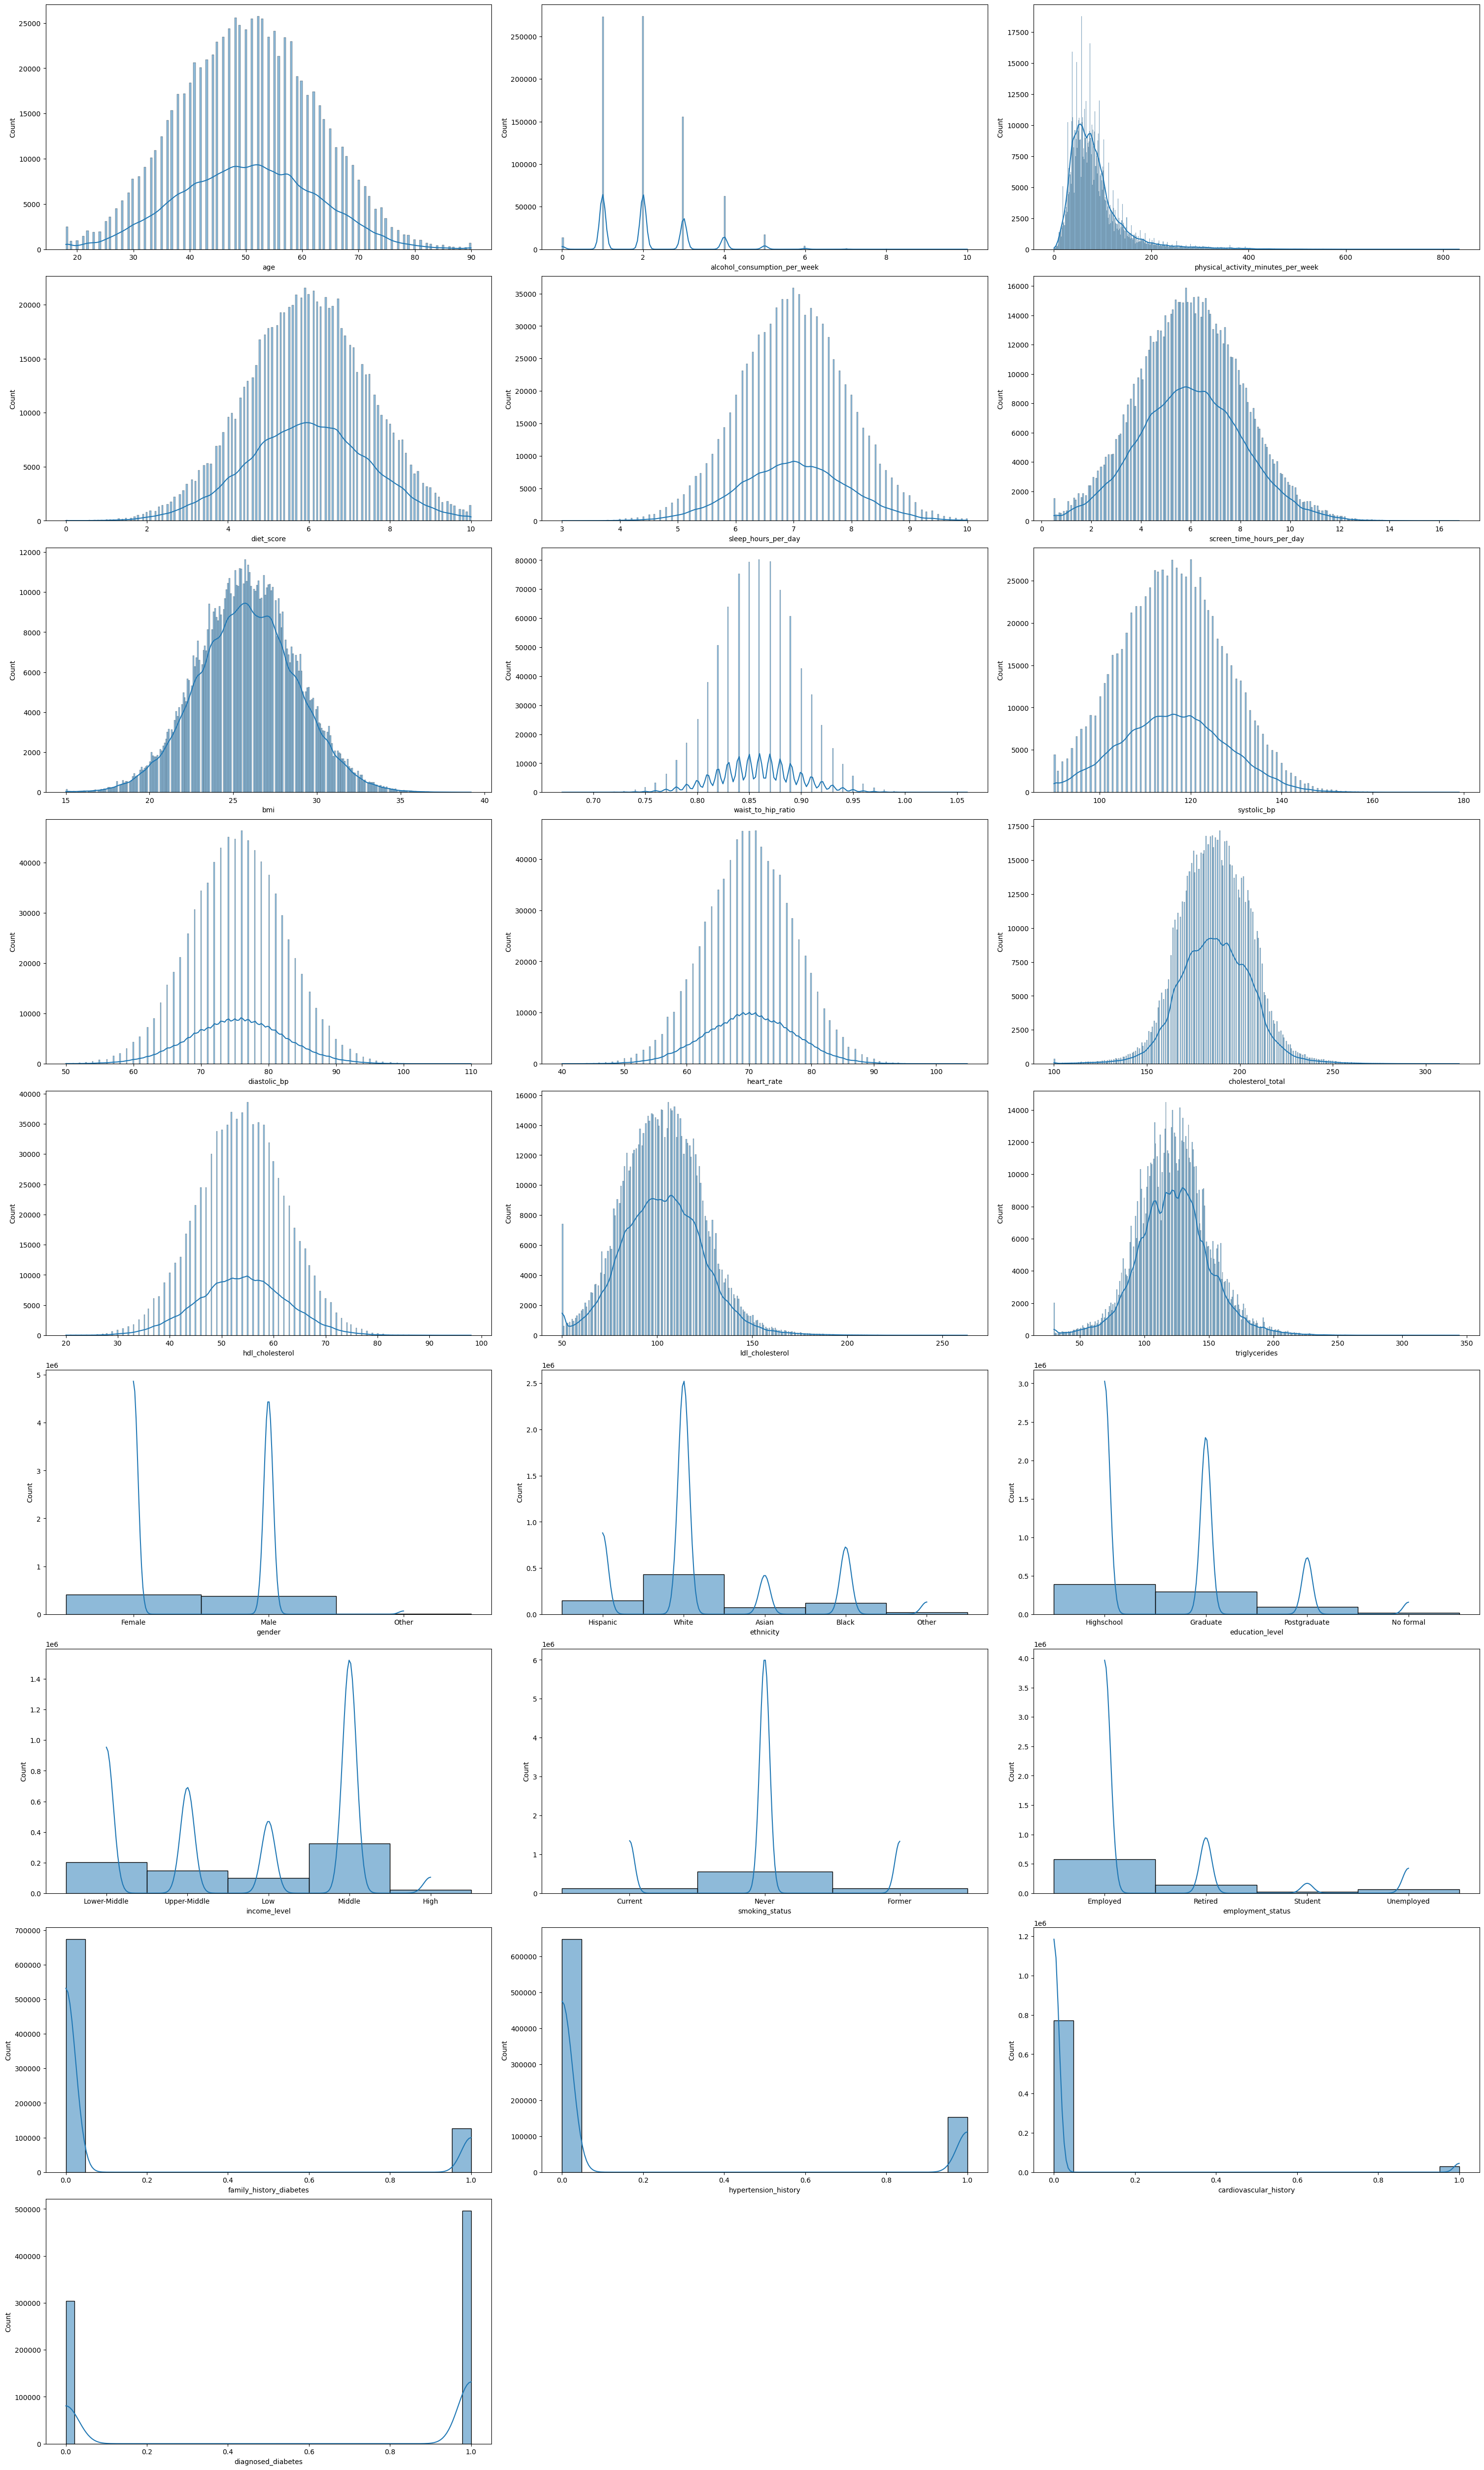

In [14]:
# view each other feature distribution of train dataset
fig = plt.figure(figsize=(30, 50), constrained_layout=True)
for i in range(len(train.columns)):
    plt.subplot(9, 3, i+1)
    sns.histplot(data=train, x=train[train.columns[i]], kde=True)

The histogram above shows that most numerical features follow an approximately normal distribution, as indicated by the bell-shaped curves. This suggests that the data are symmetrically distributed around the center, where the mean, median, and mode are relatively close to each other. Since the data distribution appears well-behaved and does not exhibit extreme skewness or significant anomalies, we decide to retain all values and do not remove any observations at this stage.

### - Numerical features correlation

To gain further insight into the relationships between numerical features, we analyze the correlation matrix using a heatmap. This visualization helps identify the strength and direction of linear relationships between variables, as well as potential multi collinearity that may impact model performance.

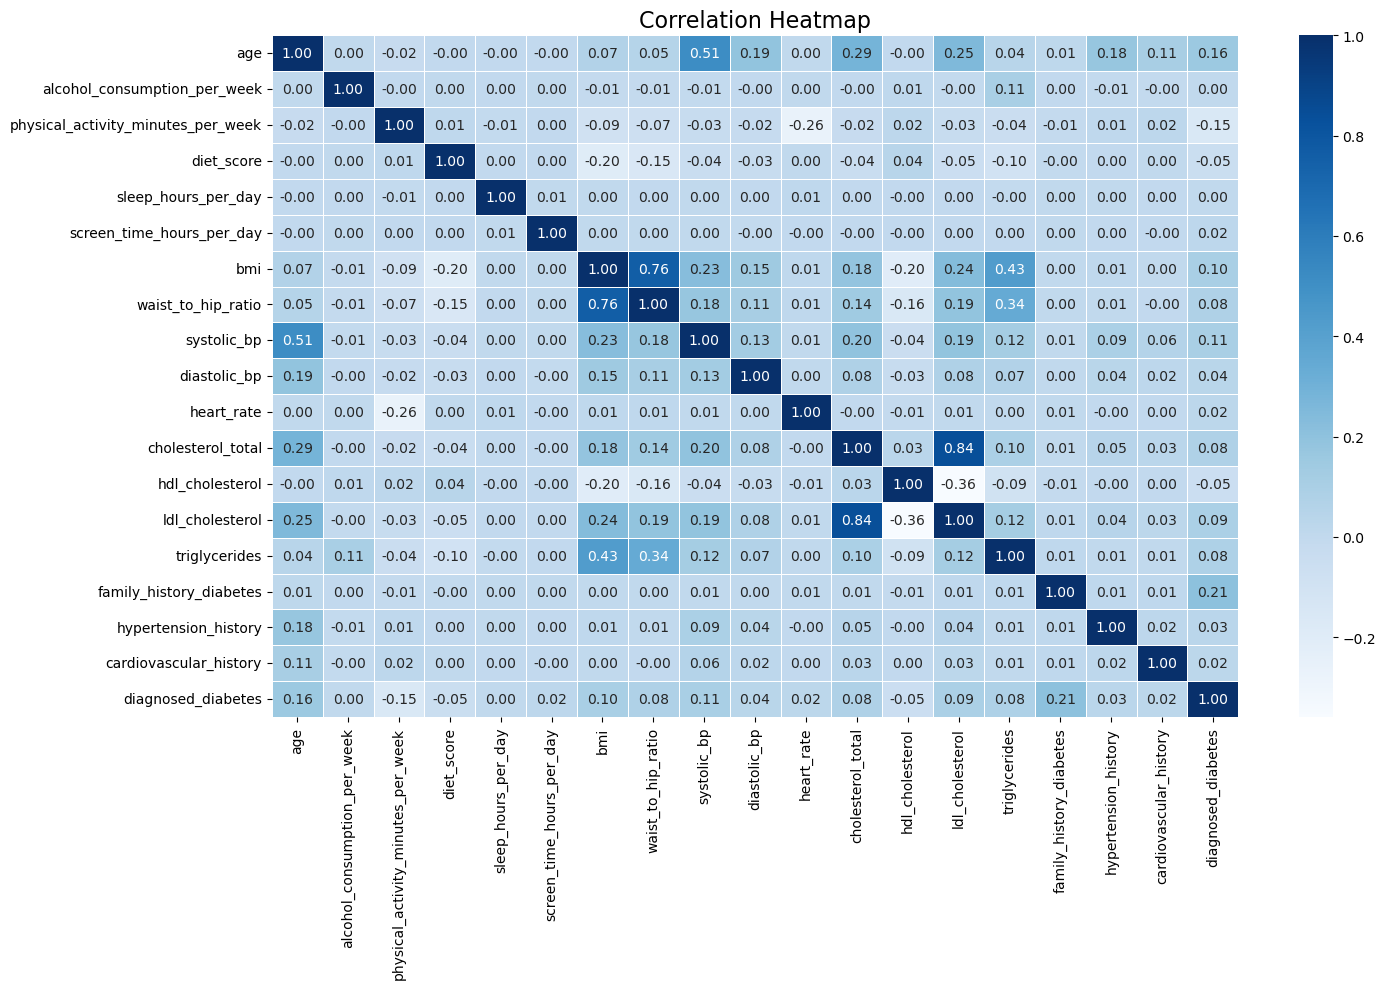

In [15]:
# create correlation dataset
corr = train.select_dtypes(exclude=['object']).corr()

# create heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f", 
    cmap="Blues",
    linewidths=0.5
)

plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

The correlation heatmap shows that most numerical features have low to moderate linear correlation with _diagnosed_diabetes_ (target). This is indicating that diabetes is influenced by multiple interacting factors rather than a single dominant variable.

## 5. Feature Engineering

### - Data transform

In this step, we will transforming raw data into suitable format.

In [16]:
# identify categorical and numerical columns
cat_col = train.select_dtypes(include=['object']).columns.tolist()
print(cat_col)

['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']


as we can see, our dataset has six categorical columns, and based on the EDA we will transform these columns with two encoders which are one hot encoder (_'gender' and 'ethnicity'_) and label encoder (_'education_level', 'income_level', 'smoking_status' and 'employment_status'_)

In [17]:
# see the unique label_encoding
print ('unique of education_level : ', train['education_level'].unique())
print ('unique of income_level : ', train['income_level'].unique())
print ('unique of smoking_status : ', train['smoking_status'].unique())
print ('unique of employment_status : ', train['employment_status'].unique())

unique of education_level :  ['Highschool' 'Graduate' 'Postgraduate' 'No formal']
unique of income_level :  ['Lower-Middle' 'Upper-Middle' 'Low' 'Middle' 'High']
unique of smoking_status :  ['Current' 'Never' 'Former']
unique of employment_status :  ['Employed' 'Retired' 'Student' 'Unemployed']


In [18]:
# initialize one_hot_col
one_hot_col = ['gender','ethnicity']

# initialize mapping for label encoder
education_level_map = {'No formal':1, 'Highschool':2, 'Graduate':3, 'Postgraduate':4}
income_level_map = {'Low':1, 'Lower-Middle':2, 'Middle':3, 'Upper-Middle':4, 'High':5}
smoking_status_map = {'Never':0, 'Current':2, 'Former':1}
employment_status_map = {'Employed':3, 'Retired':2, 'Student':1, 'Unemployed':0}

### - Split dataset

In this step, we will split the the _train_ dataset and the _additional_dataset_ where the _train_ dataset will be used to train the model and the _additional_dataset_ will be used as validation set. The model's performance will be measured by calculating the AUC (Area Under the ROC Curve) between the predicted lables (y_pred) generated from the train dataset and the actual lables (y_actual) from the additional dataset.

In [19]:
# initialize train test dataset
# train dataset
x_train = pd.get_dummies(train, columns=one_hot_col, drop_first=False, dtype=int).drop(columns='diagnosed_diabetes')
x_train['education_level'] = x_train['education_level'].map(education_level_map)
x_train['income_level'] = x_train['income_level'].map(income_level_map)
x_train['smoking_status'] = x_train['smoking_status'].map(smoking_status_map)
x_train['employment_status'] = x_train['employment_status'].map(employment_status_map)
y_train = train['diagnosed_diabetes']

# test dataset
x_test = pd.get_dummies(test, columns=one_hot_col, drop_first=False, dtype=int)
x_test['education_level'] = x_test['education_level'].map(education_level_map)
x_test['income_level'] = x_test['income_level'].map(income_level_map)
x_test['smoking_status'] = x_test['smoking_status'].map(smoking_status_map)
x_test['employment_status'] = x_test['employment_status'].map(employment_status_map)

# additional_dataset
x_add = pd.get_dummies(additional_dataset, columns=one_hot_col, drop_first=False, dtype=int).drop(columns='diagnosed_diabetes')
x_add['education_level'] = x_add['education_level'].map(education_level_map)
x_add['income_level'] = x_add['income_level'].map(income_level_map)
x_add['smoking_status'] = x_add['smoking_status'].map(smoking_status_map)
x_add['employment_status'] = x_add['employment_status'].map(employment_status_map)
y_add = additional_dataset['diagnosed_diabetes']

# original train dataset
original_x_train = x_train.iloc[:-100000].reset_index(drop=True)
original_y_train = y_train.iloc[:-100000].reset_index(drop=True)

## 6. Modelling

In this step, we will train the model using the _train_ dataset and evaluate its preformance using the _additional_dataset_ as a validation set. The model's performance will be measured by calculating hte AUC (Area Under the ROC Curve) between the predicted lables (y_pred) generated from the train dataset and the actual lables (y_actual) from the additional dataset.

The model that achieves the highest AUC score will be selected and subsequently applied to predict the _test_ dataset.

### Logistic Regression

In [20]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression

# create model object
model_lr = LogisticRegression()

# fit model
model_lr.fit(original_x_train, original_y_train)
prediction_lr = model_lr.predict_proba(x_add)[:,1]

# AUC score
auc_score_lr = roc_auc_score(y_add, prediction_lr)

### Decision Tree Classifier

In [21]:
# import DecisionTreeeClassifier
from sklearn.tree import DecisionTreeClassifier

# create model object
model_dt = DecisionTreeClassifier()

# fit model
model_dt.fit(original_x_train, original_y_train)
prediction_dt = model_dt.predict_proba(x_add)[:,1]

# AUC score
auc_score_dt = roc_auc_score(y_add, prediction_dt)

### Random Forest

In [22]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# create model object
model_rf = RandomForestClassifier()

# fit model
model_rf.fit(original_x_train, original_y_train)
prediction_rf = model_rf.predict_proba(x_add)[:,1]

# AUC score
auc_score_rf = roc_auc_score(y_add, prediction_rf)

### XGB Classifier

In [23]:
# import XGBClassifier
from xgboost import XGBClassifier

# create model object
model_xgb = XGBClassifier()

# fit model
model_xgb.fit(original_x_train, original_y_train)
prediction_xgb = model_xgb.predict_proba(x_add)[:,1]

# AUC score
auc_score_xgb = roc_auc_score(y_add, prediction_xgb)

### LGBM Classifier

In [24]:
# import LGBMClassifier
from lightgbm import LGBMClassifier

# create model object
model_lgbm = LGBMClassifier()

# fit model
model_lgbm.fit(original_x_train, original_y_train)
prediction_lgbm = model_lgbm.predict_proba(x_add)[:,1]

# AUC score
auc_score_lgbm = roc_auc_score(y_add, prediction_lgbm)

[LightGBM] [Info] Number of positive: 436307, number of negative: 263693
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1656
[LightGBM] [Info] Number of data points in the train set: 700000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623296 -> initscore=0.503561
[LightGBM] [Info] Start training from score 0.503561


### Cat Boost Classifier

In [25]:
# import CatBoostClassifier
from catboost import CatBoostClassifier

# create model object
model_cb = CatBoostClassifier()

# fit model
model_cb.fit(original_x_train, original_y_train)
prediction_cb = model_cb.predict_proba(x_add)[:,1]

# AUC score
auc_score_cb = roc_auc_score(y_add, prediction_cb)

Learning rate set to 0.168963
0:	learn: 0.6654682	total: 252ms	remaining: 4m 11s
1:	learn: 0.6471681	total: 329ms	remaining: 2m 44s
2:	learn: 0.6341014	total: 403ms	remaining: 2m 13s
3:	learn: 0.6253945	total: 484ms	remaining: 2m
4:	learn: 0.6191286	total: 552ms	remaining: 1m 49s
5:	learn: 0.6148596	total: 620ms	remaining: 1m 42s
6:	learn: 0.6116776	total: 700ms	remaining: 1m 39s
7:	learn: 0.6093425	total: 770ms	remaining: 1m 35s
8:	learn: 0.6074996	total: 841ms	remaining: 1m 32s
9:	learn: 0.6062362	total: 913ms	remaining: 1m 30s
10:	learn: 0.6050004	total: 986ms	remaining: 1m 28s
11:	learn: 0.6042679	total: 1.06s	remaining: 1m 27s
12:	learn: 0.6032620	total: 1.14s	remaining: 1m 26s
13:	learn: 0.6025006	total: 1.22s	remaining: 1m 26s
14:	learn: 0.6018838	total: 1.3s	remaining: 1m 25s
15:	learn: 0.6013982	total: 1.37s	remaining: 1m 24s
16:	learn: 0.6009759	total: 1.45s	remaining: 1m 24s
17:	learn: 0.6005714	total: 1.52s	remaining: 1m 23s
18:	learn: 0.6002968	total: 1.61s	remaining: 1m 2

### K Neighbors Classifier

In [26]:
# import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# create model object
model_knn = KNeighborsClassifier()

# fit model
model_knn.fit(original_x_train, original_y_train)
prediction_knn = model_knn.predict_proba(x_add)[:,1]

# AUC score
auc_score_knn = roc_auc_score(y_add, prediction_knn)

### SVC

In [27]:
from sklearn.svm import LinearSVC
model_svc = LinearSVC()
model_svc.fit(original_x_train, original_y_train)
prediction_svc = model_svc.predict(x_add)

# AUC score
auc_score_svc = roc_auc_score(y_add, prediction_svc)

### Naive Bayes

In [28]:
# import GaussianNB
from sklearn.naive_bayes import GaussianNB

# create model object
model_nb = GaussianNB()

# fit model
model_nb.fit(original_x_train, original_y_train)
prediction_nb = model_nb.predict_proba(x_add)[:,1]

# AUC score
auc_score_nb = roc_auc_score(y_add, prediction_nb)

### MLP

In [29]:
# import MLPClassifier
from sklearn.neural_network import MLPClassifier

# create model object
model_mlp = MLPClassifier()

# fit model
model_mlp.fit(original_x_train, original_y_train)
prediction_mlp = model_mlp.predict_proba(x_add)[:,1]

# AUC score
auc_score_mlp = roc_auc_score(y_add, prediction_mlp)
print(auc_score_mlp)

0.6520212628156551


In [30]:
print(f"AUC Logistic Regression : {auc_score_lr}")
print(f"AUC Decision Tree : {auc_score_dt}")
print(f"AUC Random Forest : {auc_score_rf}")
print(f"AUC XGB : {auc_score_xgb}")
print(f"AUC LGBM : {auc_score_lgbm}")
print(f"AUC Cat Boost : {auc_score_cb}")
print(f"AUC K Neighbours : {auc_score_knn}")
print(f"AUC SVC : {auc_score_svc}")
print(f"AUC Naive Bayes : {auc_score_nb}")
print(f"AUC MLP : {auc_score_mlp}")

AUC Logistic Regression : 0.6189299396992216
AUC Decision Tree : 0.5370390210780471
AUC Random Forest : 0.6453243310866892
AUC XGB : 0.6481866246365671
AUC LGBM : 0.655983754280735
AUC Cat Boost : 0.6469115308860045
AUC K Neighbours : 0.5642711368381713
AUC SVC : 0.5973672298751141
AUC Naive Bayes : 0.6419088125896382
AUC MLP : 0.6520212628156551


As observed, the **LightGBM (LGBM)** model achieves the highest performance among the evaluated models. Therefore, we proceed to build the final model using the LGBM.

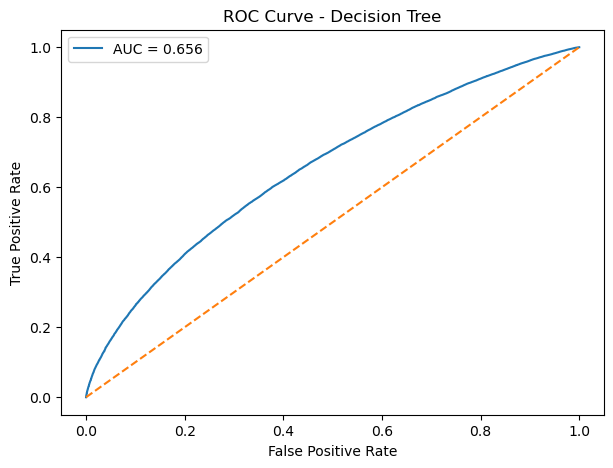

In [31]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

# ROC components
fpr, tpr, thresholds = roc_curve(y_add, prediction_lgbm)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

In [32]:
# create model object
model_lgbm = LGBMClassifier()

# fit model
model_lgbm.fit(x_train, y_train)
prediction_lgbm = model_lgbm.predict_proba(x_test)[:,1]

[LightGBM] [Info] Number of positive: 496305, number of negative: 303695
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1829
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.620381 -> initscore=0.491167
[LightGBM] [Info] Start training from score 0.491167


In [33]:
# save model to sample_sumbission
sample_submission['diagnosed_diabetes'] = prediction_lgbm
sample_submission['diagnosed_diabetes'] = sample_submission['diagnosed_diabetes']
sample_submission.to_csv('submission_s5e12_lgbm.csv', index=False)

# see the sample_submission head
sample_submission.head()

,id,diagnosed_diabetes
0,700000,0.520683
1,700001,0.699586
2,700002,0.766516
3,700003,0.412085
4,700004,0.868940
